In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [20]:
data = pd.read_csv("fake_or_real_news.csv")

In [21]:
data

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [22]:
data['fake'] = data['label'].apply(lambda x: 0 if x == "REAL" else 1)
data = data.drop("label", axis=1)

In [23]:
X, y = data["text"], data["fake"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

TF-IDF: Term Frequency - Inverse Document Frequency

A metric that indicates how important a word is to a document in a collection. It weighs the improtance of each word in a document based on how often it appears in that document and how often it appears accross all documents in the collection.

TF: Number of times a term t appears in a document
IDF: Logarithm of total number of documents divided by no. of docs that contain term
TF-IDF: TF * IDF

Basically allows us to find the most relevant and distinctive words per document.

In [24]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [25]:
clf = LinearSVC()  # Linear SVC is considered one of the best text classification algorithms
clf.fit(X_train_vectorized, y_train)

LinearSVC()

In [26]:
clf.score(X_test_vectorized, y_test)

0.9431728492501973

In [27]:
article_text = X_test.iloc[10]
vectorized_text = vectorizer.transform([article_text])

In [28]:
clf.predict(vectorized_text)

array([1], dtype=int64)

In [29]:
y_test.iloc[10]

1

In [30]:
# Generate a random index within the range of X_test
random_index = random.randint(0, len(X_test) - 1)

# Select a random article using the generated index
article_text = X_test.iloc[random_index]
vectorized_text = vectorizer.transform([article_text])

# Predict
predicted_value = clf.predict(vectorized_text)[0]

# Actual value
actual_value = y_test.iloc[random_index]

# Comparison and output
if predicted_value == actual_value:
    print("The answer is correct.")
else:
    print("The answer is incorrect.")



The answer is correct.


In [31]:
# Predict for the entire test set
predictions = clf.predict(X_test_vectorized)

# Convert predictions and actual labels to arrays for easier comparison
predictions_array = np.array(predictions)
actual_labels_array = y_test.to_numpy()

# Find indices where predictions and actual labels differ
mismatch_indices = np.where(predictions_array != actual_labels_array)[0]

# Print first 2 mismatches with its index
for index in mismatch_indices[:2]:
    print(f"Index: {index}, Predicted: {predictions_array[index]}, Actual: {actual_labels_array[index]}")
    print(f"Text: {X_test.iloc[index]}\n")


Index: 4, Predicted: 1, Actual: 0
Text: Fact Check: Did Hillary Clinton Introduce A New Approach To Early Education?

This week Hillary Clinton was in Virginia to talk about women, family and workplace issues. She met at the Mug'n Muffin coffee shop with local participants in a program called Home Instruction for Parents of Preschool Youngsters.

In HIPPY, as it's called, parents receive free books, educational materials and weekly home visits to coach them on how to get their young children ready for school — for example, by reading to them daily.

A Clinton campaign video features Bill Clinton, in a speech, crediting his wife with bringing the program to the U.S. from Israel when she was first lady of Arkansas in 1985.

"She comes in one day, jumping up and down happy," the former president says in the video. "She says, 'I found it. A preschool program in Israel that teaches people to be their children's first teachers even if they're illiterate. I think it could work here.' ... Next

In [32]:
# Predict for the entire test set
predictions = clf.predict(X_test_vectorized)

# Convert predictions and actual labels to arrays for easier comparison
predictions_array = np.array(predictions)
actual_labels_array = y_test.to_numpy()

# Initialize lists for false negatives and false positives
false_negatives = []
false_positives = []

# Iterate over the predictions and actual labels
for i in range(len(predictions_array)):
    if predictions_array[i] == 0 and actual_labels_array[i] == 1:
        # False Negative
        false_negatives.append(i)
    elif predictions_array[i] == 1 and actual_labels_array[i] == 0:
        # False Positive
        false_positives.append(i)

In [33]:
# Print False Negatives
print("False Negatives: ACTUALLY FAKE")
for index in false_negatives:
    print(f"Index: {index}, Text: {X_test.iloc[index]}")
    print()


False Negatives: ACTUALLY FAKE
Index: 33, Text:  
After the release of a WikiLeaks email chain from March 2015 on Tuesday in which a top Clinton aide admitted President Barack Obama falsely claimed he did not know about Hillary Clinton’s private server use while she was secretary of state, White House Press Secretary Josh Earnest sprung into action to deny that the president had lied about the issue.
“What the president said was an entirely factual response,” Earnest said to a group of reporters in Los Angeles where Obama was attending Democratic fundraisers.
Earnest then attempted to explain away all criticism of the president’s actions as mere conspiracies.
 
Related Stories Hannity Proposes A Sendoff For Obama In The Event Of A Trump Presidency WikiLeaks: Podesta Said Obamas ‘Don’t Need To Be This Nice’ To President Bush And First Lady WikiLeaks Reveals Obama Knew About Clinton’s Emails; ‘Clean This Up’ “I recognize that some of the president’s critics have attempted to construct so

In [34]:
# Print False Positives
print("\nFalse Positives: ACTUALLY REAL")
for index in false_positives:
    print(f"Index: {index}, Text: {X_test.iloc[index]}")
    print()


False Positives: ACTUALLY REAL
Index: 4, Text: Fact Check: Did Hillary Clinton Introduce A New Approach To Early Education?

This week Hillary Clinton was in Virginia to talk about women, family and workplace issues. She met at the Mug'n Muffin coffee shop with local participants in a program called Home Instruction for Parents of Preschool Youngsters.

In HIPPY, as it's called, parents receive free books, educational materials and weekly home visits to coach them on how to get their young children ready for school — for example, by reading to them daily.

A Clinton campaign video features Bill Clinton, in a speech, crediting his wife with bringing the program to the U.S. from Israel when she was first lady of Arkansas in 1985.

"She comes in one day, jumping up and down happy," the former president says in the video. "She says, 'I found it. A preschool program in Israel that teaches people to be their children's first teachers even if they're illiterate. I think it could work here.' 

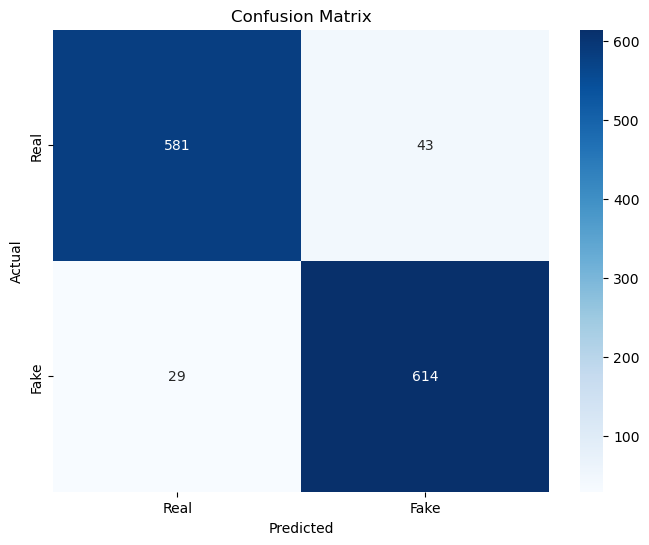

In [35]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
